In [48]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [5]:
data = sns.load_dataset('tips')

In [6]:
data = pd.DataFrame(data)

In [7]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


visualisasi Data

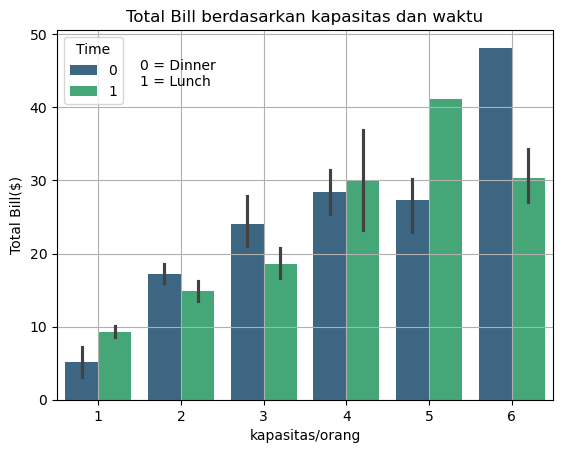

In [84]:
sns.barplot(x='size',y='total_bill',hue='time',data=data,palette='viridis',)
plt.title('Total Bill berdasarkan kapasitas dan waktu')
plt.xlabel('kapasitas/orang')
plt.ylabel('Total Bill($)')
plt.legend(title='Time')
plt.text(x=0.5,y=43,s='0 = Dinner\n1 = Lunch')
plt.grid()
plt.show()

_________________________

output : memprediksi untuk Meningkatkan rata-rata total bill atau total penjualan berdasarkan kapasitas orang yang membeli diwaktu yang paling ramai dikunjungi, dengan harapan untuk menambah kapasitas lebih dari 5 orang di waktu tertentu (dinner atau lunch) 

Assign data pada kolom time 

Assign data untuk time Dinner : 0
Assign data untuk time lunch : 1

In [ ]:
data['time']
encoder = preprocessing.LabelEncoder()
data_encoder = encoder.fit_transform(data['time'])

data['time'] = data_encoder

print(data['time'])


0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int64
     total_bill   tip     sex smoker   day  time  size
0         16.99  1.01  Female     No   Sun     0     2
1         10.34  1.66    Male     No   Sun     0     3
2         21.01  3.50    Male     No   Sun     0     3
3         23.68  3.31    Male     No   Sun     0     2
4         24.59  3.61  Female     No   Sun     0     4
..          ...   ...     ...    ...   ...   ...   ...
239       29.03  5.92    Male     No   Sat     0     3
240       27.18  2.00  Female    Yes   Sat     0     2
241       22.67  2.00    Male    Yes   Sat     0     2
242       17.82  1.75    Male     No   Sat     0     2
243       18.78  3.00  Female     No  Thur     0     2

[244 rows x 7 columns]


Model Selection

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

model = LinearRegression()


memisahkan variabel Target(Y) dengan fitur(X)
-   untuk variabel taget menggunakan kolom total_bill
-   untuk fitur menggunakan kolom size/kapasitas orang yang datang dan time

In [59]:
data_train = pd.DataFrame(data)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    int64   
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(2)
memory usage: 8.9 KB


In [63]:
x = data_train[['size','time']]
y = data_train['total_bill']

membagi data menjadi data latih dan data test

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_prediction = model.predict(x_test)

Evaluasi Model

In [67]:
mse = mean_squared_error(y_test,y_prediction)
r2squared = r2_score(y_test,y_prediction)

output Hasil

In [69]:
print(f'Koefisien Model (w): {model.coef_[0]}\n')
print(f'intercepts (b) :{model.intercept_}\n')
print(f'Mean Squared Eror : {mse}\n')
print(f'R-Squared (R2):{r2squared}')

Koefisien Model (w): 5.072226900146686

intercepts (b) :8.066638630597506

Mean Squared Eror : 50.20910761669814

R-Squared (R2):0.4078314677485976


In [75]:
new_data = pd.DataFrame({
    'size'  : [7,8,9,10],
    'time'  : [0,1,0,0]
})
predict_spend = model.predict(new_data)

print(f'Prediksi  : {predict_spend}\n')
print(f'Prediksi Total Bill untuk kapasitas 7 orang dengan waktu dinner : {predict_spend[0]}')
print(f'Prediksi Total Bill untuk kapasitas 8 orang dengan waktu Lunch  : {predict_spend[1]}')
print(f'Prediksi Total Bill untuk kapasitas 9 orang dengan waktu dinner :{predict_spend[2]}')
print(f'Prediksi Total Bill untuk kapasitas 10 orang dengan waktu dinner : {predict_spend[3]}')

Prediksi  : [43.57222693 45.3085588  53.71668073 58.78890763]

Prediksi Total Bill untuk kapasitas 7 orang dengan waktu dinner : 43.5722269316243
Prediksi Total Bill untuk kapasitas 8 orang dengan waktu Lunch  : 45.30855879705118
Prediksi Total Bill untuk kapasitas 9 orang dengan waktu dinner :53.71668073191768
Prediksi Total Bill untuk kapasitas 10 orang dengan waktu dinner : 58.788907632064365
